In [1]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import difflib

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# B3.0 Principle ZERO SHOT

## Notebook to evaluate GPT-annotate results

Codebooks:
- B3.0: zero shot
- B3.1: one shot
- B3.0.1: zero shot with specific inclusion of context
- B3.1.1: one shot with specific inclusion of context

Test for 5 different seeds [3644,3441, 280, 5991, 7917]
> Refer to these as S1-5

Batch of 20 sentences
1 Iteration.

Main outcomes: T0 - I1
For testing purposes: (T 0.6 I1 - T 0 I3)

FINGERPRINT USED: fp_319be4768e


In [8]:
# Basic stats of train dataset:
HLS_train = pd.read_csv('data/string/HLS_train_string.csv')

In [10]:
HLS_train['PRINCIPLE'].value_counts()

not evaluated                  992
prioritarian                    66
utilitarian                     59
egalitarian                     52
general normative statement     34
sufficientarian                  8
libertarian                      1
Name: PRINCIPLE, dtype: int64

# 1. Results B3.0

### 1. Import Results
Results created under the same fingerprint are saved in a CSV file for each seed. All results are combined into one dataset.

In [11]:
#B1.0
path_B3 = 'STRING_RESULT/B3.0/all_iterations'

# Open all dataframes
S1 = pd.read_csv(f'{path_B3}/all_iterations_string_T0_3644.csv')
S2 = pd.read_csv(f'{path_B3}/all_iterations_string_T0_3441.csv')
S3 = pd.read_csv(f'{path_B3}/all_iterations_string_T0_280.csv')
S4 = pd.read_csv(f'{path_B3}/all_iterations_string_T0_5991.csv')
S5 = pd.read_csv(f'{path_B3}/all_iterations_string_T0_7917.csv')

seeds_B3 = {
    "S1": [S1],
    "S2": [S2],
    "S3": [S3],
    "S4": [S4],
    "S5": [S5]
}

### 2. Evaluate missed batches

In [12]:
# Evaluate missed batches
B3_missed = pd.read_csv('STRING_RESULT/B3.0/T0_missed_batches.csv')
B3_missed

,Unnamed: 0,Missed batch
0,0,3441 - I1 - B18
1,1,280 - I1 - B22
2,2,7917 - I1 - B13
3,3,7917 - I1 - B55


Evaluate missed batches

## 2. Evaluate metrics
Evaluation is performed with SKLEARN - presenting 5 classification reports

Column RELEVANCE_x is the ground truth label - RELEVANCE_y is the predicted label

Save as dataframes - if neccessary

In [14]:
print(classification_report(S1['PRINCIPLE_x'],S1['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.35      0.58      0.43        52
general normative statement       0.09      0.65      0.16        34
                libertarian       0.00      0.00      0.00         1
              not evaluated       0.99      0.60      0.74       992
               prioritarian       0.35      0.68      0.46        66
            sufficientarian       0.29      0.62      0.40         8
                utilitarian       0.26      0.63      0.37        59

                   accuracy                           0.60      1212
                  macro avg       0.33      0.54      0.37      1212
               weighted avg       0.86      0.60      0.68      1212



In [15]:
print(classification_report(S2['PRINCIPLE_x'],S2['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.35      0.60      0.44        50
general normative statement       0.09      0.62      0.15        34
                libertarian       0.00      0.00      0.00         1
              not evaluated       0.99      0.60      0.74       976
               prioritarian       0.34      0.65      0.45        65
            sufficientarian       0.33      0.62      0.43         8
                utilitarian       0.27      0.66      0.38        58

                   accuracy                           0.60      1192
                  macro avg       0.34      0.53      0.37      1192
               weighted avg       0.86      0.60      0.68      1192



In [16]:
print(classification_report(S3['PRINCIPLE_x'],S3['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.35      0.62      0.45        52
general normative statement       0.09      0.62      0.15        34
                libertarian       0.00      0.00      0.00         1
              not evaluated       0.99      0.59      0.74       973
               prioritarian       0.35      0.67      0.46        66
            sufficientarian       0.29      0.62      0.40         8
                utilitarian       0.26      0.60      0.36        58

                   accuracy                           0.60      1192
                  macro avg       0.33      0.53      0.37      1192
               weighted avg       0.86      0.60      0.67      1192



In [17]:
print(classification_report(S4['PRINCIPLE_x'],S4['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.38      0.62      0.47        52
general normative statement       0.09      0.65      0.16        34
                libertarian       0.00      0.00      0.00         1
              not evaluated       0.99      0.59      0.74       992
               prioritarian       0.35      0.70      0.46        66
            sufficientarian       0.28      0.62      0.38         8
                utilitarian       0.25      0.63      0.35        59

                   accuracy                           0.60      1212
                  macro avg       0.33      0.54      0.37      1212
               weighted avg       0.86      0.60      0.67      1212



In [18]:
print(classification_report(S5['PRINCIPLE_x'],S5['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.39      0.61      0.47        51
general normative statement       0.10      0.64      0.17        33
                libertarian       0.00      0.00      0.00         1
              not evaluated       0.99      0.61      0.75       965
               prioritarian       0.36      0.67      0.46        63
            sufficientarian       0.38      0.86      0.52         7
                utilitarian       0.24      0.65      0.35        52

                   accuracy                           0.62      1172
                  macro avg       0.35      0.58      0.39      1172
               weighted avg       0.87      0.62      0.69      1172



Metrics over 5 seeds are very similar.
Macro avg: average of all classes (aka labels)
Weighted avg: weighted average, taking class balances into account.

In [30]:
# Assuming S1, S2, S3, S4, and S5 are your dataframes
dataframes = [S1, S2, S3, S4, S5]
report_dfs = []

# Generate a classification report for each dataframe and convert it to a dataframe
for i, df in enumerate(dataframes):
    report = classification_report(df['PRINCIPLE_x'], df['PRINCIPLE_y'], output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df['source'] = f"S{i+1}"  # Add a source column to identify the original dataframe
    report_dfs.append(report_df)

# Concatenate all classification report dataframes
all_reports_df = pd.concat(report_dfs).reset_index()

# Calculate the mean and standard deviation for each metric, excluding the support column
metrics = all_reports_df.columns.difference(['index', 'source', 'support'])
mean_df = all_reports_df[metrics].groupby(all_reports_df['index']).mean()
std_df = all_reports_df[metrics].groupby(all_reports_df['index']).std()

# Print the results
print("Mean of each metric:")
print(mean_df)
print("\nStandard Deviation of each metric:")
print(std_df)

Mean of each metric:
                             f1-score  precision    recall
index                                                     
accuracy                     0.603402   0.603402  0.603402
egalitarian                  0.452789   0.362659  0.603107
general normative statement  0.160767   0.092078  0.633155
libertarian                  0.000000   0.000000  0.000000
macro avg                    0.372538   0.337388  0.544128
not evaluated                0.743774   0.988505  0.596213
prioritarian                 0.459096   0.348819  0.671655
sufficientarian              0.428227   0.314869  0.671429
utilitarian                  0.363112   0.254786  0.633341
weighted avg                 0.678409   0.861119  0.603402

Standard Deviation of each metric:
                             f1-score  precision    recall
index                                                     
accuracy                     0.007263   0.007263  0.007263
egalitarian                  0.016679   0.018105  0.015962

## 3. Confusion matrix
Evaluate where misclassifications are found - Again for each seed.

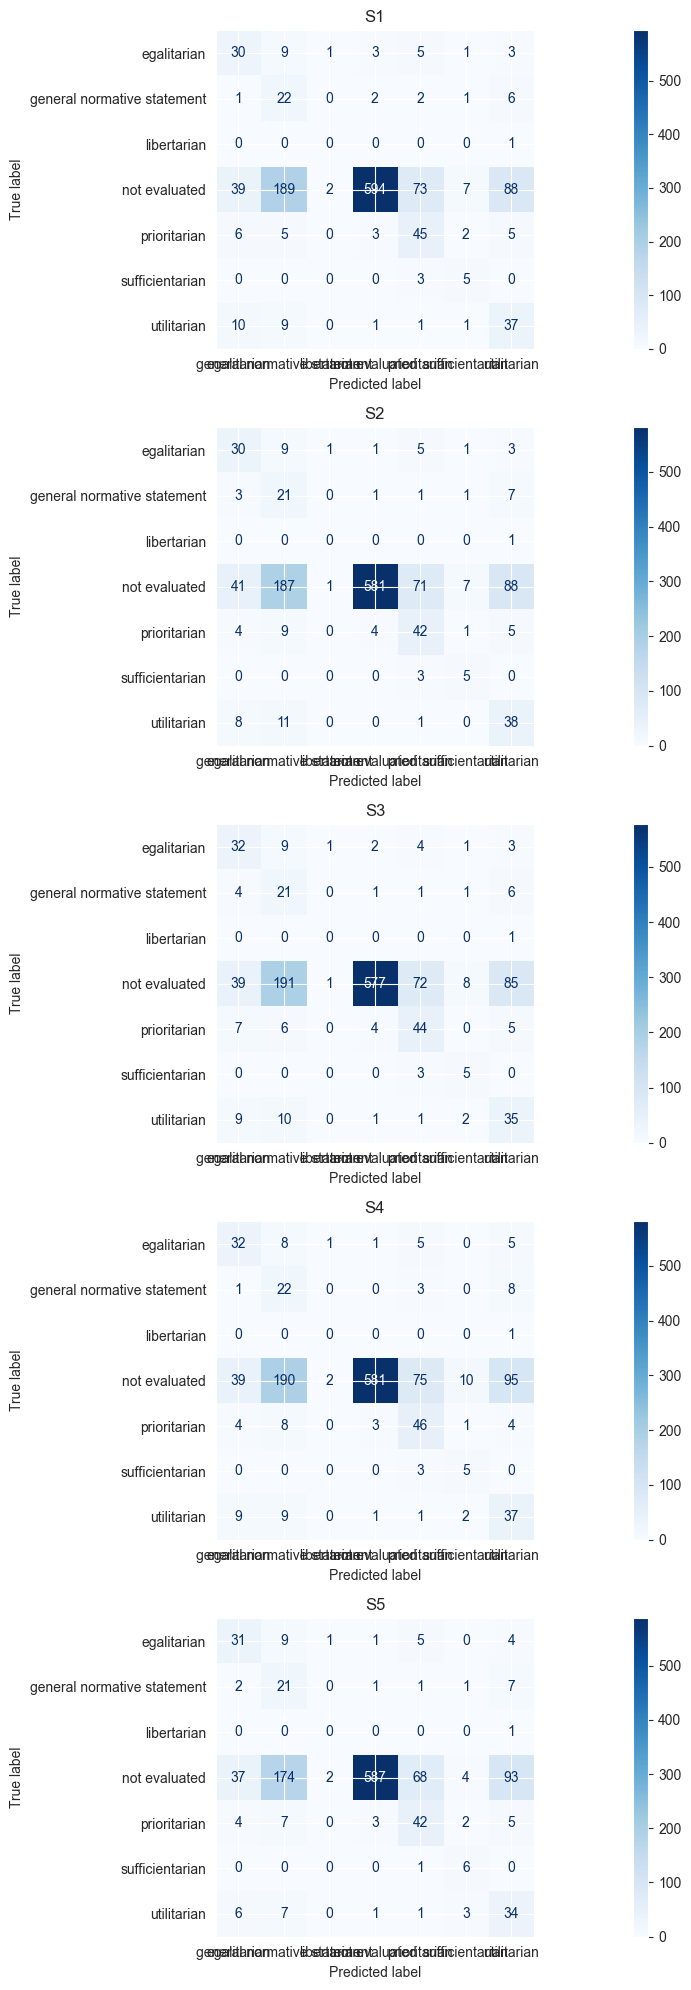

In [20]:
labels = ['egalitarian', 'general normative statement', 'libertarian','not evaluated',
          'prioritarian', 'sufficientarian', 'utilitarian']
# Number of plots
num_plots = len(seeds_B3)
# Create plot names
plot_names = list(seeds_B3.keys())

# Create subplots
fig, axes = plt.subplots(num_plots, 1, figsize=(20, 20))

# Visualize the confusion matrix
for i, name in enumerate(plot_names):
    df = seeds_B1[name][0]  # Access the dataframe
    cm = confusion_matrix(df['PRINCIPLE_x'], df['PRINCIPLE_y'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues, ax=axes[i])
    axes[i].set_title(name)

# Adjust layout
plt.tight_layout()
plt.show()

## 4. Evaluate misclassifications of sentences
Special interest in relevant sentences that are incorrectly classified. Evaluate if the same sentences are misclassified in each seed

# 2. Results B3.0.1 - zero shot with context

In [21]:
#B1.0
path_B301 = 'STRING_RESULT/B3.0.1/all_iterations'

# Open all dataframes
S1_301 = pd.read_csv(f'{path_B301}/all_iterations_string_T0_3644.csv')
S2_301 = pd.read_csv(f'{path_B301}/all_iterations_string_T0_3441.csv')
S3_301 = pd.read_csv(f'{path_B301}/all_iterations_string_T0_280.csv')
S4_301 = pd.read_csv(f'{path_B301}/all_iterations_string_T0_5991.csv')
S5_301 = pd.read_csv(f'{path_B301}/all_iterations_string_T0_7917.csv')

seeds_B101 = {
    "S1": [S1_301],
    "S2": [S2_301],
    "S3": [S3_301],
    "S4": [S4_301],
    "S5": [S5_301]
}

### 2. Evaluate missed batches

In [23]:
# Evaluate missed batches
B301_missed = pd.read_csv('STRING_RESULT/B3.0.1/T0_missed_batches.csv')
B301_missed

,Unnamed: 0,Missed batch
0,0,3441 - I1 - B18
1,1,280 - I1 - B22
2,2,7917 - I1 - B13
3,3,7917 - I1 - B55
4,4,3644 - I1 - B5
5,5,5991 - I1 - B52
6,6,3441 - I1 - B39
7,7,280 - I1 - B33
8,8,280 - I1 - B50
9,9,280 - I1 - B54


S1: 2 batches (40 sentences) missed
S2: 2 batches (40 sentences) missed
S3: 4 batches (80 sentences) missed
S4: 1 batch (20 sentences) missed
S5: 4 batches (80 sentences) missed

## 2. Evaluate metrics
Evaluation is performed with SKLEARN - presenting 5 classification reports

Column RELEVANCE_x is the ground truth label - RELEVANCE_y is the predicted label

Save as dataframes - if neccessary

In [24]:
print(classification_report(S1_301['PRINCIPLE_x'],S1_301['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.30      0.62      0.40        52
general normative statement       0.09      0.41      0.14        34
                libertarian       0.00      0.00      0.00         1
              not evaluated       0.98      0.61      0.75       988
               prioritarian       0.30      0.70      0.42        66
            sufficientarian       0.22      0.50      0.31         8
                utilitarian       0.21      0.54      0.30        59

                   accuracy                           0.61      1208
                  macro avg       0.30      0.48      0.33      1208
               weighted avg       0.85      0.61      0.68      1208



In [25]:
print(classification_report(S2_301['PRINCIPLE_x'],S2_301['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.29      0.60      0.39        50
general normative statement       0.09      0.44      0.15        34
                libertarian       0.00      0.00      0.00         1
              not evaluated       0.98      0.60      0.75       971
               prioritarian       0.32      0.72      0.44        65
            sufficientarian       0.24      0.50      0.32         8
                utilitarian       0.23      0.59      0.33        59

                   accuracy                           0.60      1188
                  macro avg       0.31      0.49      0.34      1188
               weighted avg       0.85      0.60      0.67      1188



In [27]:
print(classification_report(S3_301['PRINCIPLE_x'],S3_301['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.31      0.60      0.41        45
general normative statement       0.10      0.53      0.17        32
                libertarian       0.00      0.00      0.00         1
              not evaluated       0.97      0.61      0.75       939
               prioritarian       0.31      0.70      0.43        64
            sufficientarian       0.33      0.62      0.43         8
                utilitarian       0.24      0.59      0.34        59

                   accuracy                           0.61      1148
                  macro avg       0.32      0.52      0.36      1148
               weighted avg       0.84      0.61      0.68      1148



In [26]:
print(classification_report(S4_301['PRINCIPLE_x'],S4_301['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.31      0.58      0.40        52
general normative statement       0.09      0.50      0.15        34
                libertarian       0.00      0.00      0.00         1
              not evaluated       0.98      0.60      0.74       992
               prioritarian       0.30      0.68      0.42        66
            sufficientarian       0.28      0.62      0.38         8
                utilitarian       0.23      0.59      0.33        59

                   accuracy                           0.60      1212
                  macro avg       0.31      0.51      0.35      1212
               weighted avg       0.84      0.60      0.67      1212



In [29]:
print(classification_report(S5_301['PRINCIPLE_x'],S5_301['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.33      0.63      0.43        52
general normative statement       0.11      0.53      0.19        34
                libertarian       0.00      0.00      0.00         0
              not evaluated       0.98      0.62      0.76       939
               prioritarian       0.29      0.66      0.41        62
            sufficientarian       0.31      0.62      0.42         8
                utilitarian       0.25      0.63      0.36        57

                   accuracy                           0.62      1152
                  macro avg       0.33      0.53      0.37      1152
               weighted avg       0.85      0.62      0.69      1152



C:\App\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\App\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\App\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Assuming S1, S2, S3, S4, and S5 are your dataframes
dataframes = [S1_301, S2_301, S3_301, S4_301, S5_301]
report_dfs = []

# Generate a classification report for each dataframe and convert it to a dataframe
for i, df in enumerate(dataframes):
    report = classification_report(df['PRINCIPLE_x'], df['PRINCIPLE_y'], output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df['source'] = f"S{i+1}"  # Add a source column to identify the original dataframe
    report_dfs.append(report_df)

# Concatenate all classification report dataframes
all_reports_df = pd.concat(report_dfs).reset_index()

# Calculate the mean and standard deviation for each metric, excluding the support column
metrics = all_reports_df.columns.difference(['index', 'source', 'support'])
mean_df = all_reports_df[metrics].groupby(all_reports_df['index']).mean()
std_df = all_reports_df[metrics].groupby(all_reports_df['index']).std()

# Print the results
print("Mean of each metric:")
print(mean_df)
print("\nStandard Deviation of each metric:")
print(std_df)

Mean of each metric:
                             f1-score  precision    recall
index                                                     
accuracy                     0.606947   0.606947  0.606947
egalitarian                  0.408735   0.308652  0.605385
general normative statement  0.159420   0.095545  0.482721
libertarian                  0.000000   0.000000  0.000000
macro avg                    0.349558   0.313758  0.507767
not evaluated                0.749643   0.979268  0.607282
prioritarian                 0.423296   0.304670  0.693256
sufficientarian              0.372751   0.276225  0.575000
utilitarian                  0.333063   0.231948  0.590723
weighted avg                 0.676838   0.846294  0.606947

Standard Deviation of each metric:
                             f1-score  precision    recall
index                                                     
accuracy                     0.008934   0.008934  0.008934
egalitarian                  0.015589   0.014084  0.021345

C:\App\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\App\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\App\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
